Consider only the below columns and prepare a prediction model for predicting Price.

*Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
Toyo=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
Toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
Toyo1 = pd.DataFrame({"Pr":Toyo.Price, "Age":Toyo.Age_08_04, "KM":Toyo.KM, "HP":Toyo.HP, "CC":Toyo.cc, "Doors":Toyo.Doors, "Gears":Toyo.Gears, "QTax":Toyo.Quarterly_Tax, "Wt":Toyo.Weight})
Toyo1

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
Toyo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pr      1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Wt      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
Toyo1.isna().sum()

Pr       0
Age      0
KM       0
HP       0
CC       0
Doors    0
Gears    0
QTax     0
Wt       0
dtype: int64

In [ ]:
Toyo1[Toyo1.duplicated()]

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
Toyo1=Toyo1.drop_duplicates()

In [ ]:
Toyo1

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


Preparing a model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Pr~Age+KM+HP+CC+Doors+Gears+QTax+Wt",data=Toyo1).fit()

In [ ]:
#Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Wt             16.855470
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QTax          2.944198
Wt           15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTax          3.290363e-03
Wt            1.031118e-51
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

Correlation Matrix

In [ ]:
Toyo1.corr()

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
Pr,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


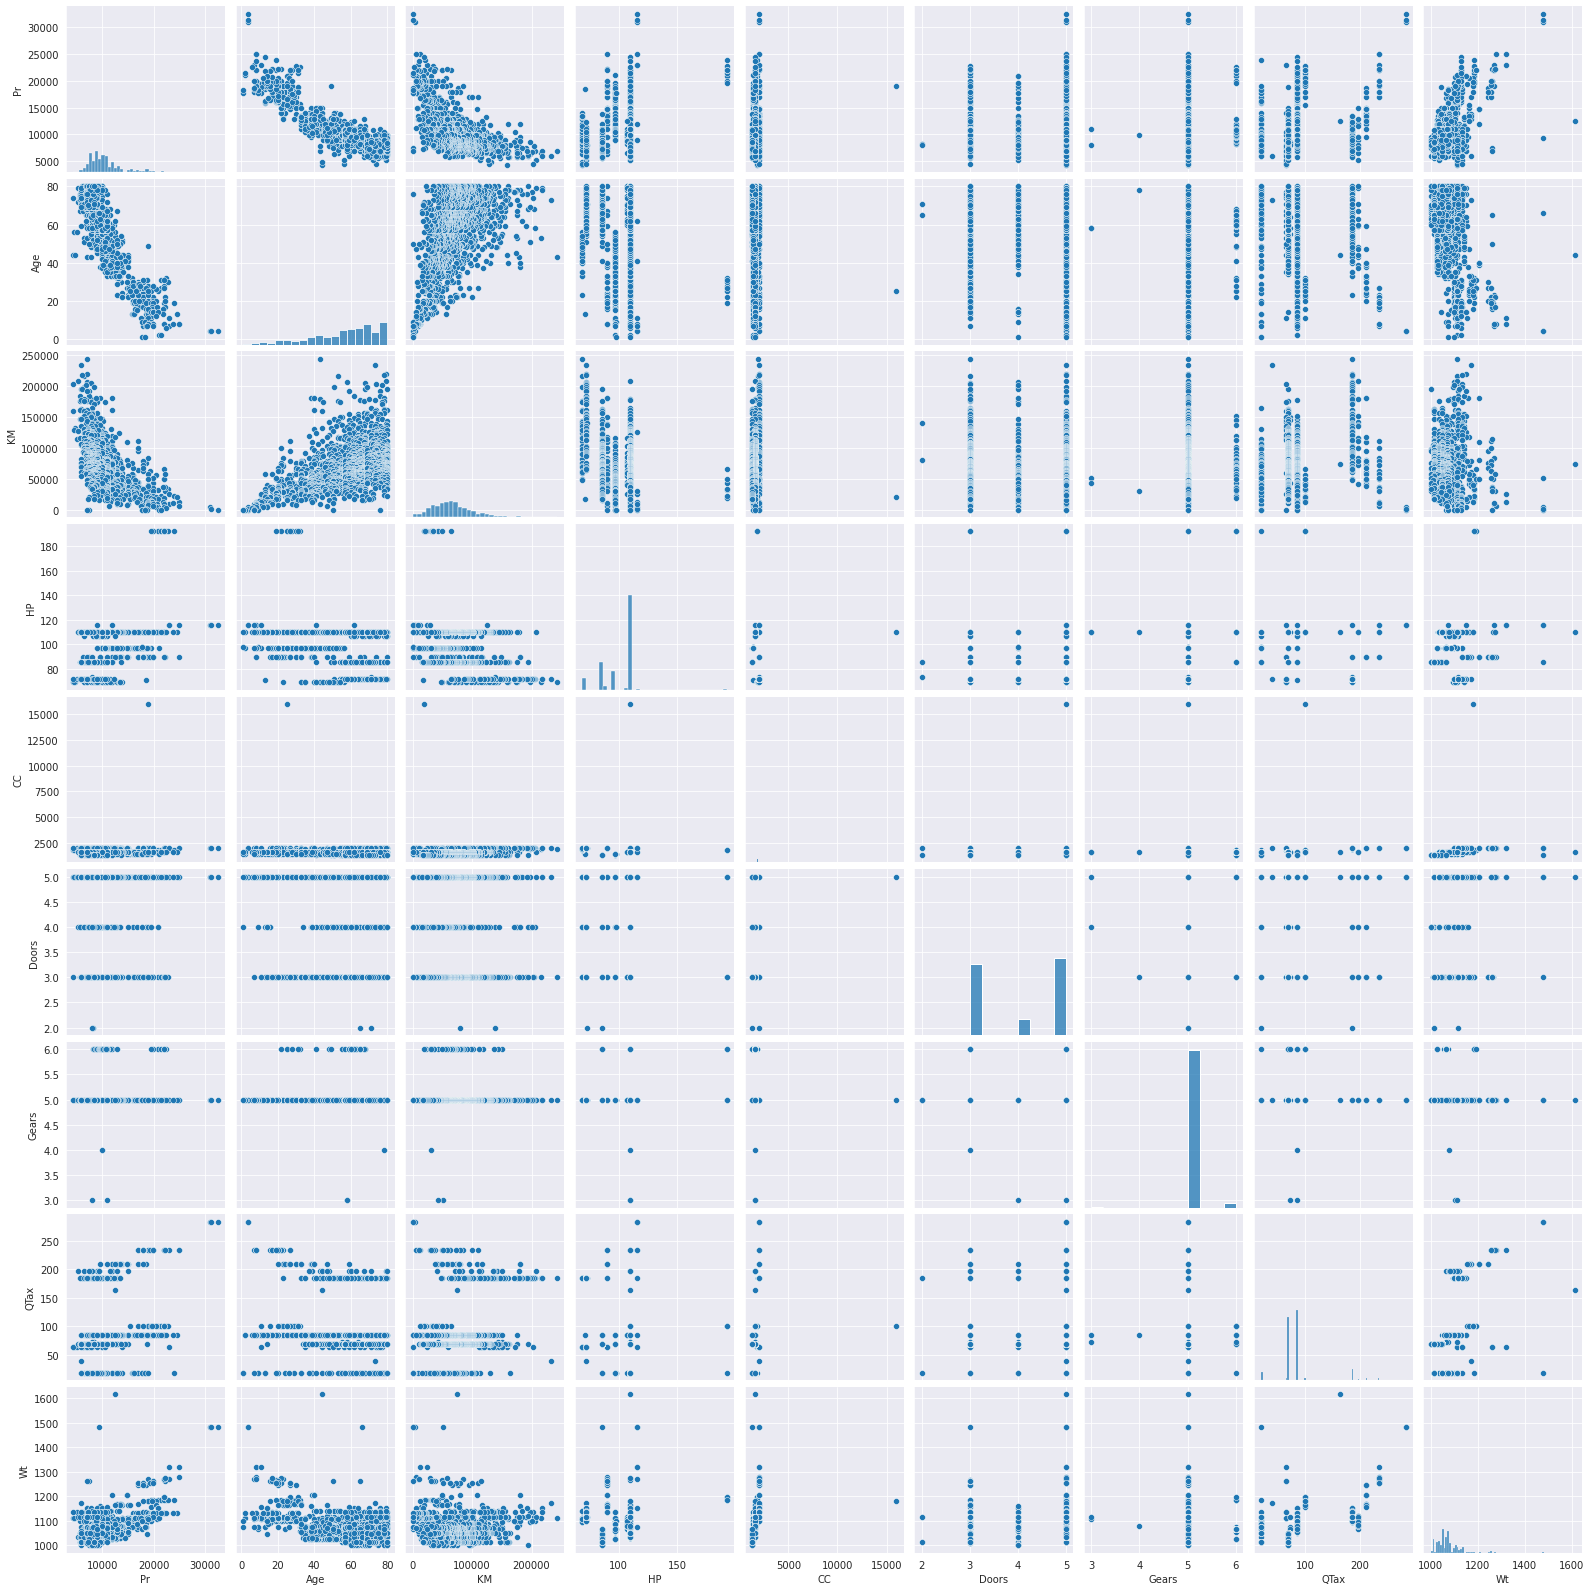

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyo1)

Calculating VIF

In [ ]:
rsquared_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QTax+Wt", data=Toyo1).fit().rsquared
Vif_Age = 1/(1-rsquared_Age)

rsquared_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QTax+Wt", data=Toyo1).fit().rsquared
Vif_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols("HP~Age+KM+CC+Doors+Gears+QTax+Wt", data=Toyo1).fit().rsquared
Vif_HP = 1/(1-rsquared_HP)

rsquared_CC = smf.ols("CC~Age+KM+HP+Doors+Gears+QTax+Wt", data=Toyo1).fit().rsquared
Vif_CC = 1/(1-rsquared_CC)

rsquared_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QTax+Wt", data=Toyo1).fit().rsquared
Vif_Doors = 1/(1-rsquared_Doors)

rsquared_Gears = smf.ols("Gears~Age+KM+HP+CC+Doors+QTax+Wt", data=Toyo1).fit().rsquared
Vif_Gears = 1/(1-rsquared_Gears)

rsquared_QuarterlyTax = smf.ols("QTax~Age+KM+HP+CC+Doors+Gears+Wt", data=Toyo1).fit().rsquared
Vif_QTax = 1/(1-rsquared_QuarterlyTax)

rsquared_Weight = smf.ols("Wt~Age+KM+HP+CC+Doors+Gears+QTax", data=Toyo1).fit().rsquared
Vif_Wt = 1/(1-rsquared_Weight)

In [ ]:

Vif={"Features":["Age","KM","HP","CC","Doors","Gears","QTax","Wt"],"Vif_Values":[Vif_Age,Vif_KM,Vif_HP,Vif_CC,Vif_Doors,Vif_Gears,Vif_QTax,Vif_Wt]}
Vif_Frame = pd.DataFrame(Vif)
Vif_Frame

,Features,Vif_Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,Wt,2.487180


Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

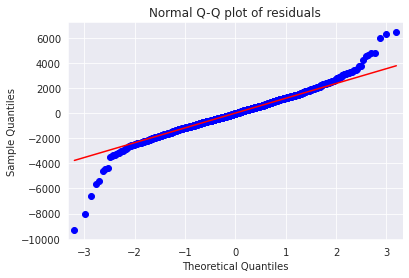

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

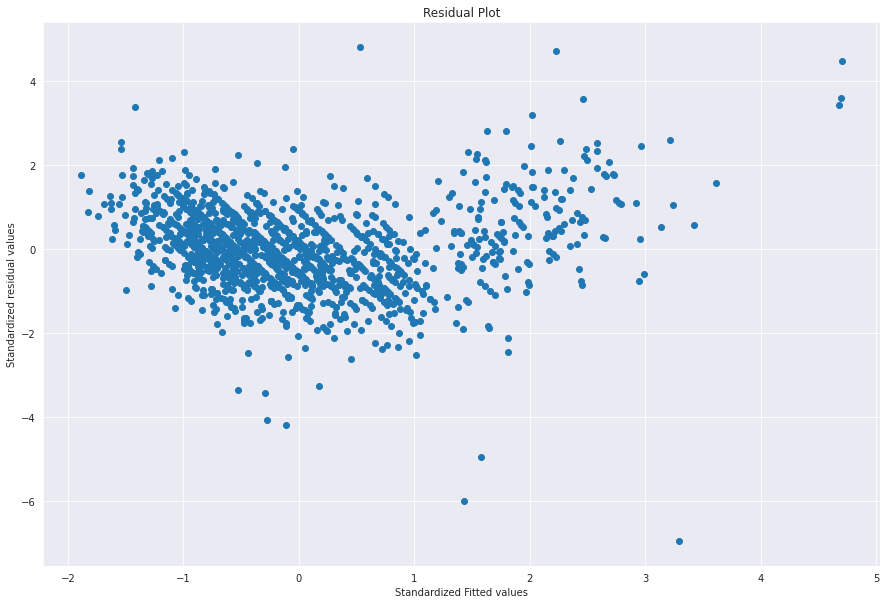

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

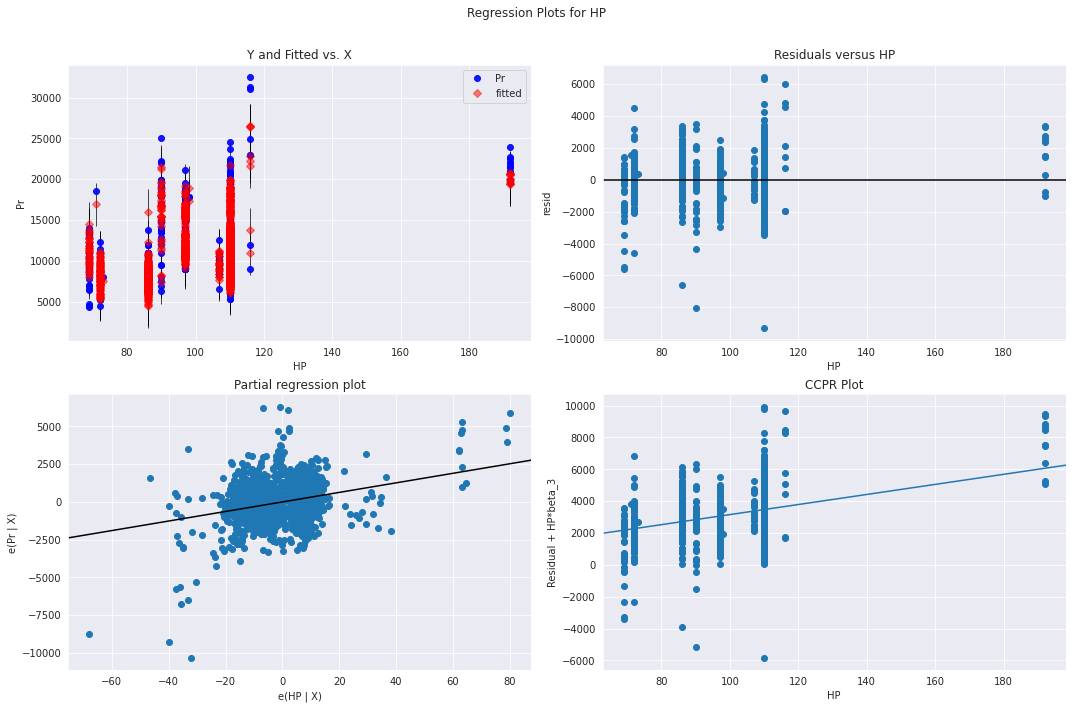

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

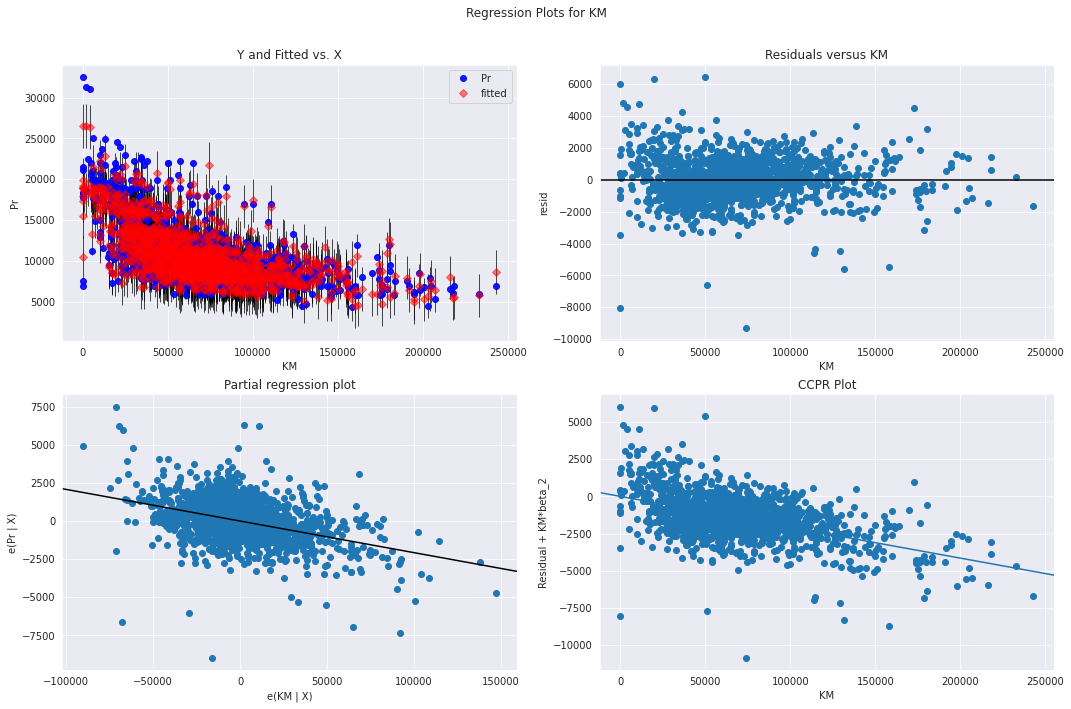

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

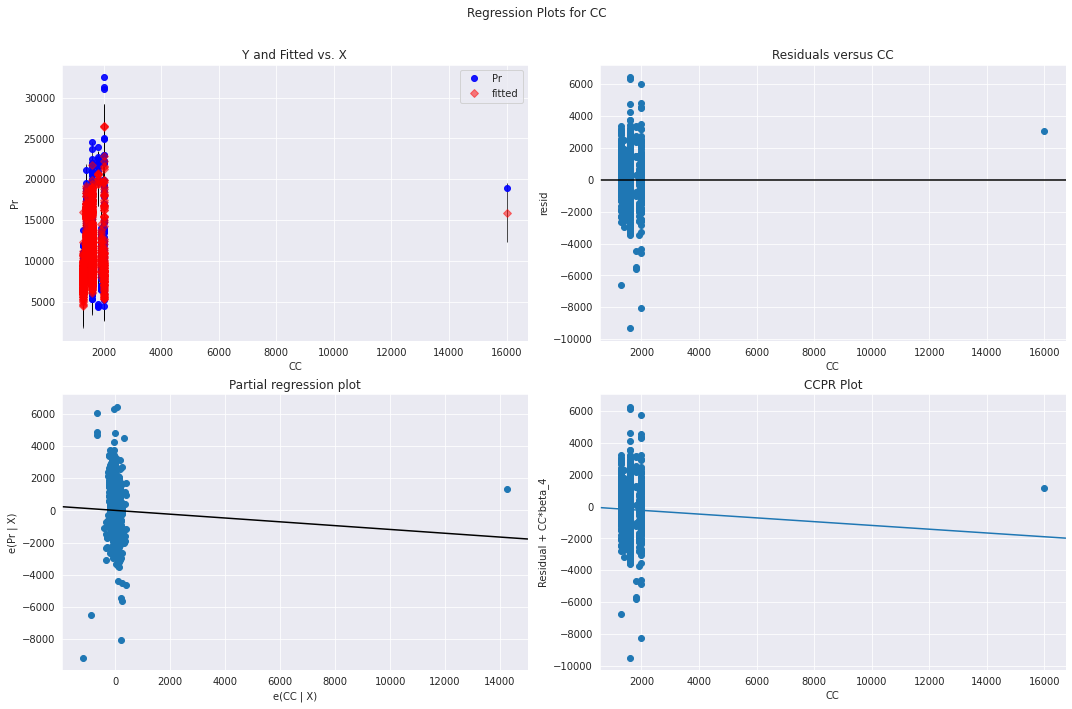

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

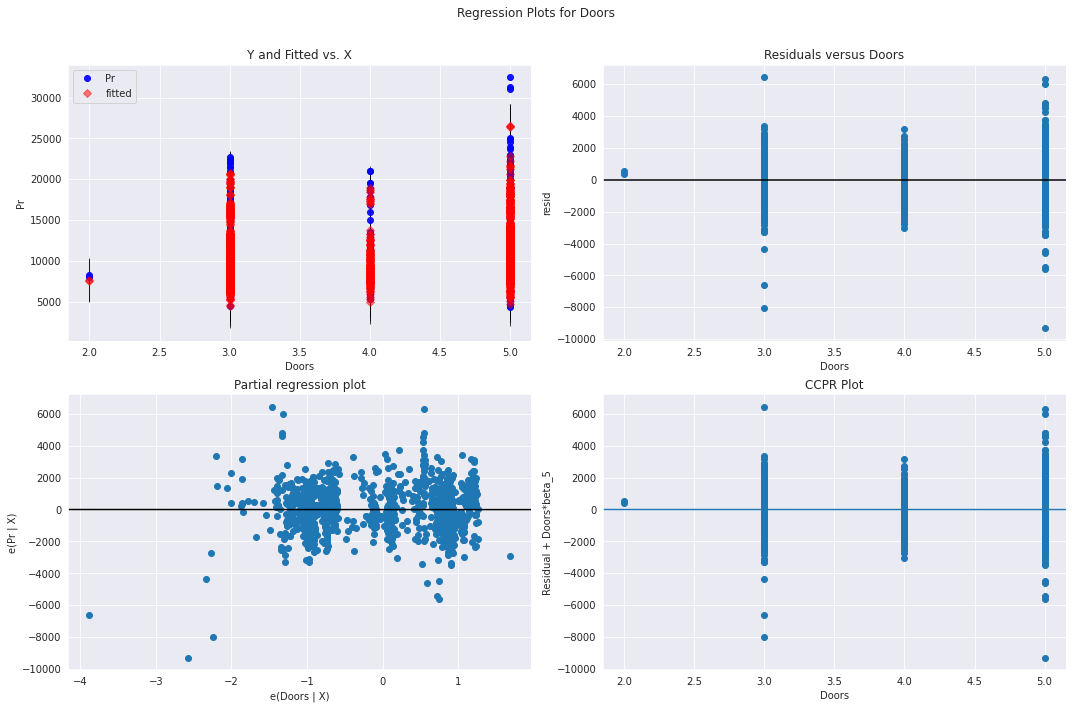

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

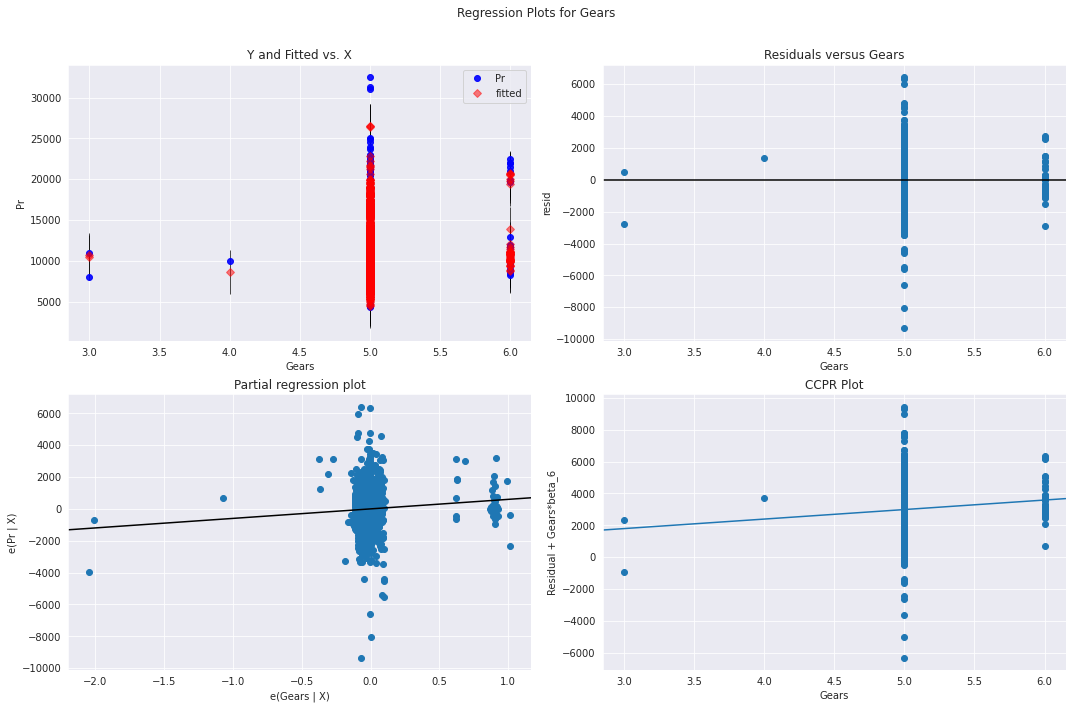

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

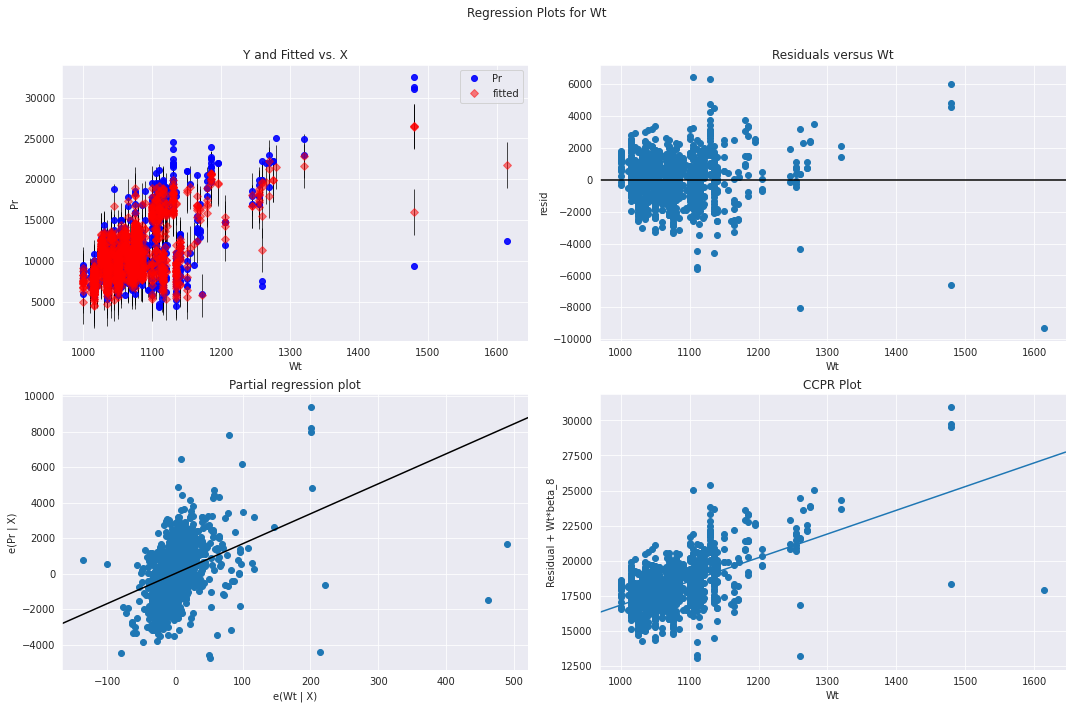

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Wt", fig=fig)
plt.show()


Cook’s Distance

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


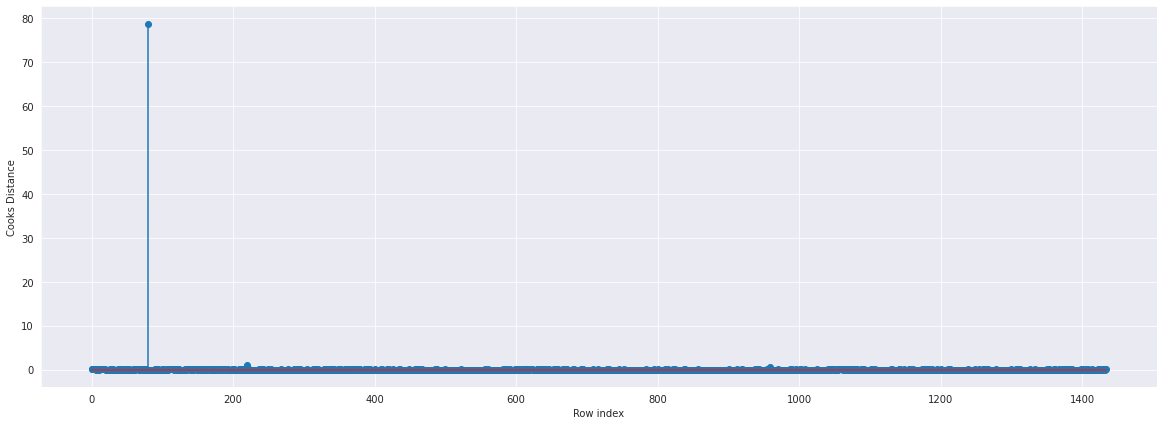

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyo1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582258927)

High Influence points

In [ ]:
Toyo.shape

(1436, 38)

In [ ]:
k = Toyo1.shape[1]
n = Toyo1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

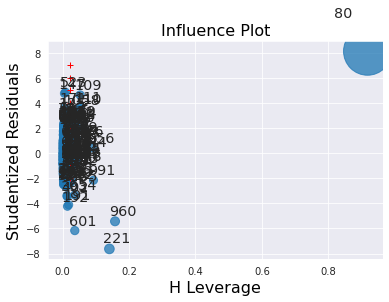

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
Toyo1[Toyo1.index.isin([80])]

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
Toyo1=Toyo1.drop(Toyo.index[[80]]).reset_index(drop=True)
Toyo1.shape

(1434, 9)

In [ ]:
final_m1_v = smf.ols("Pr~Age+KM+HP+CC+Doors+Gears+QTax+Wt",data=Toyo1).fit()
final_m1_v.rsquared,final_m1_v.aic

(0.8681163912634053, 24669.363894157)

In [ ]:
final_m1_v.predict(Toyo1)

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64